In [1]:
import sys
sys.path.append("../kaggle")
%load_ext autoreload
%aimport varie
%autoreload 2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\ProgramData\Anacon

In [2]:
from sklearn import *
import pandas as pd
import numpy as np

df_train = pd.read_csv(
    './input/train.csv', usecols=[1, 2, 3, 4, 5], 
    dtype={
        'onpromotion': np.bool,
        "store_nbr": "category",
        "item_nbr": "category",
        },
    converters={'unit_sales': lambda u: float(u) if float(u) > 0 else 0},
    skiprows=range(1, 124035460),    
    parse_dates=["date"]  # , date_parser=parser
    #skiprows=range(1, 66458909)
)

print("ok reading")

#df_train['date'] = pd.to_datetime(df_train.date, format='%Y-%m-%d')
#df_train['date']=df_train['date'].dt.date
df_train["unit_sales"] = df_train["unit_sales"].apply(np.log1p)
df_train["unit_sales"]=df_train["unit_sales"].astype("float32")
len(df_train)

ok reading


1461581

### test

In [3]:
df_test = pd.read_csv(
    "./input/test.csv", usecols=[0, 1, 2, 3, 4],
    dtype={
        'onpromotion': np.bool,
        "store_nbr": "category",
        "item_nbr": "category",
        },
    parse_dates=["date"]  # , date_parser=parser
)
#.set_index(
#    ['store_nbr', 'item_nbr', 'date']
#)



In [4]:
print(len(df_test))
df_test.head()


3370464


,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [5]:
dates_test=df_test.date.unique()
stores_test=df_test.store_nbr.unique()
items_test=df_test.item_nbr.unique()
print(dates_test.min(),dates_test.max(),len(dates_test))
print(len(stores_test),len(items_test))
print(len(dates_test)*len(stores_test)*len(items_test),len(df_test))

2017-08-16T00:00:00.000000000 2017-08-31T00:00:00.000000000 16
54 3901
3370464 3370464


### items

In [6]:
items = pd.read_csv(
    "./input/items.csv",    
    dtype={
        'perishable': np.bool,
        "family": "category",
        "class": "category",
        "item_nbr": "category",

        },
).set_index("item_nbr")

print(len(items))
items.head()
#items.perishable.value_counts()

4100


,family,class,perishable
item_nbr,,,
96995,GROCERY I,1093,False
99197,GROCERY I,1067,False
103501,CLEANING,3008,False
103520,GROCERY I,1028,False
103665,BREAD/BAKERY,2712,True


In [7]:
items.describe(include="all")

,family,class,perishable
count,4100,4100,4100
unique,33,337,2
top,GROCERY I,1016,False
freq,1334,133,3114


### stores

In [8]:
stores = pd.read_csv(
    "./input/stores.csv",    
    dtype={
        "store_nbr": "category",
        "city": "category",
        "state": "category",
        "type": "category",
        "cluster": "category",
        },
).set_index("store_nbr")

print(len(stores))
stores.head()
#items.perishable.value_counts()

54


,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
len(stores.city.unique()),len(stores.state.unique()),len(stores.type.unique()),len(stores.cluster.unique())

(22, 16, 5, 17)

### oil

In [10]:
 oil = pd.read_csv(
    "./input/oil.csv", 
     parse_dates=["date"]   
).set_index("date")

In [11]:
print(len(oil))
oil.head()

1218


,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [12]:
oil.tail()

,dcoilwtico
date,
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46
2017-08-30,45.96
2017-08-31,47.26


In [13]:
oil=oil.ffill().bfill()

In [14]:
oil.head()

,dcoilwtico
date,
2013-01-01,93.14
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


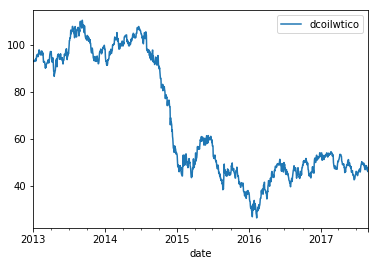

In [15]:
%matplotlib inline
oil.plot()

### transactions

In [16]:
transactions = pd.read_csv(
    "./input/transactions.csv",
    dtype={
        "store_nbr": "category",
        },
    parse_dates=["date"]  # , date_parser=parser
)

In [17]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### holidays

In [18]:
holidays = pd.read_csv(
    "./input/holidays_events.csv",
    dtype={
        "type": "category",
        "locale": "category",
        "locale_name": "category",
        "description": "category",
        "transferred":np.bool,
        },
    parse_dates=["date"]  # , date_parser=parser
)

In [19]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [20]:
holidays.locale_name.unique()

[Manta, Cotopaxi, Cuenca, Libertad, Riobamba, ..., Santa Elena, Quito, Loja, Salinas, Guayaquil]
Length: 24
Categories (24, object): [Manta, Cotopaxi, Cuenca, Libertad, ..., Quito, Loja, Salinas, Guayaquil]

In [21]:
holidays.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


### train

In [22]:
df_train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2017-08-02,1,96995,0.693147,False
1,2017-08-02,1,103520,0.693147,False
2,2017-08-02,1,103665,1.098612,False
3,2017-08-02,1,105574,2.197225,False
4,2017-08-02,1,105575,2.197225,False


In [23]:
import sys
sys.getsizeof(df_train)/1024/1024

22.69764232635498

In [24]:
print(len(df_train.item_nbr.unique()))
print(len(df_train.store_nbr.unique()))

3852
54


In [25]:
df_train.dtypes

date           datetime64[ns]
store_nbr            category
item_nbr             category
unit_sales            float32
onpromotion              bool
dtype: object

In [26]:
df_train.onpromotion.value_counts()

False    1311453
True      150128
Name: onpromotion, dtype: int64

In [27]:
df_train.describe(include="all")

,date,store_nbr,item_nbr,unit_sales,onpromotion
count,1461581,1461581,1461581,1.461581e+06,1461581
unique,14,54,3852,NaN,2
top,2017-08-05 00:00:00,45,2042947,NaN,False
freq,110884,38924,756,NaN,1311453
first,2017-08-02 00:00:00,NaN,NaN,NaN,NaN
last,2017-08-15 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.684567e+00,NaN
std,NaN,NaN,NaN,8.558324e-01,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,1.098612e+00,NaN


In [28]:
df_train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2017-08-02,1,96995,0.693147,False
1,2017-08-02,1,103520,0.693147,False
2,2017-08-02,1,103665,1.098612,False
3,2017-08-02,1,105574,2.197225,False
4,2017-08-02,1,105575,2.197225,False


### merging

In [29]:
print(oil.index[0],df_train.date[0])

2013-01-01 00:00:00 2017-08-02 00:00:00


In [30]:
df_train_test=df_train.append(df_test)
len(df_train_test)

4832045

In [31]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [32]:
oil2=oil.loc[df_train_test.date.unique()].ffill().bfill()
#transactions2=transactions.loc[df_train_test.date.unique(),"date"]

In [33]:
final_df=df_train_test.\
            merge(items,left_on="item_nbr",right_index=True).\
            merge(stores,left_on="store_nbr",right_index=True).\
            merge(oil2,left_on="date",right_index=True)#.\
            #merge(transactions,on=["date","store_nbr"],how="left")
len(final_df)

4832045

In [34]:
for c in final_df.columns:
    if (final_df[c].isnull().any()): print(c)

id
unit_sales


In [35]:
final_df.head()


,date,id,item_nbr,onpromotion,store_nbr,unit_sales,family,class,perishable,city,state,type,cluster,dcoilwtico
0,2017-08-02,NaN,96995,False,1,0.693147,GROCERY I,1093,False,Quito,Pichincha,D,13,49.6
1,2017-08-02,NaN,103520,False,1,0.693147,GROCERY I,1028,False,Quito,Pichincha,D,13,49.6
2,2017-08-02,NaN,103665,False,1,1.098612,BREAD/BAKERY,2712,True,Quito,Pichincha,D,13,49.6
3,2017-08-02,NaN,105574,False,1,2.197225,GROCERY I,1045,False,Quito,Pichincha,D,13,49.6
4,2017-08-02,NaN,105575,False,1,2.197225,GROCERY I,1045,False,Quito,Pichincha,D,13,49.6


In [36]:
cols_to_enc=["family","class","city","state","type","cluster"]
enc=varie.bin_enc(final_df,cols_to_enc)

In [37]:
enc.tail().T

,1461385,1461347,1461542,1461064,1461063
family_0,0,0,0,0,0
family_1,0,0,1,1,1
family_2,0,0,0,0,0
family_3,0,0,0,0,0
family_4,0,0,1,1,1
family_5,0,0,1,1,1
class_0,0,0,1,1,1
class_1,0,0,0,0,0
class_2,0,0,0,0,0
class_3,0,0,0,0,0


In [44]:
dff_train=enc[enc["unit_sales"].notnull()][enc["date"]<cut_date]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ValueError: cannot reindex from a duplicate axis

In [42]:
%matplotlib inline
import varie
cut_date='2017-8-11'
dff_train,dff_eval,dff_test=varie.train_eval_test(enc,cut_date=cut_date,target="unit_sales",date="date")
dff_train.groupby("date")["unit_sales"].mean().plot()
dff_eval.groupby("date")["unit_sales"].mean().plot()
len(dff_train), len(dff_eval), len(dff_test)

../kaggle\varie.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train=df[df[target].notnull()][df[date]<cut_date]        #train


ValueError: cannot reindex from a duplicate axis

In [ ]:
dff_train.columns

In [ ]:
dff_train.isnull().any()

In [ ]:
dff_test

In [ ]:
items

In [ ]:
import varie
varie.test(dff_train,dff_eval, linear_model.LinearRegression(),"unit_sales",drop=["date","id"])

In [ ]:
dff_test

In [ ]:
import varie

varie.make_csv(dff_train,dff_eval,dff_test,linear_model.LinearRegression(),
               "unit_sales","linear.csv",drop=["date","id"],columns=["id","unit_sales"])